In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [4]:
pip install openpyxl

In [5]:
import pandas as pd
df=pd.read_csv("forestfires.csv")

In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
df["temp"].value_counts()

temp
19.6    8
17.4    8
15.4    7
20.6    7
19.1    6
       ..
27.3    1
29.2    1
28.9    1
26.7    1
25.6    1
Name: count, Length: 192, dtype: int64

In [9]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Saving figure numeric_attribute_histogram_plots_forestfires


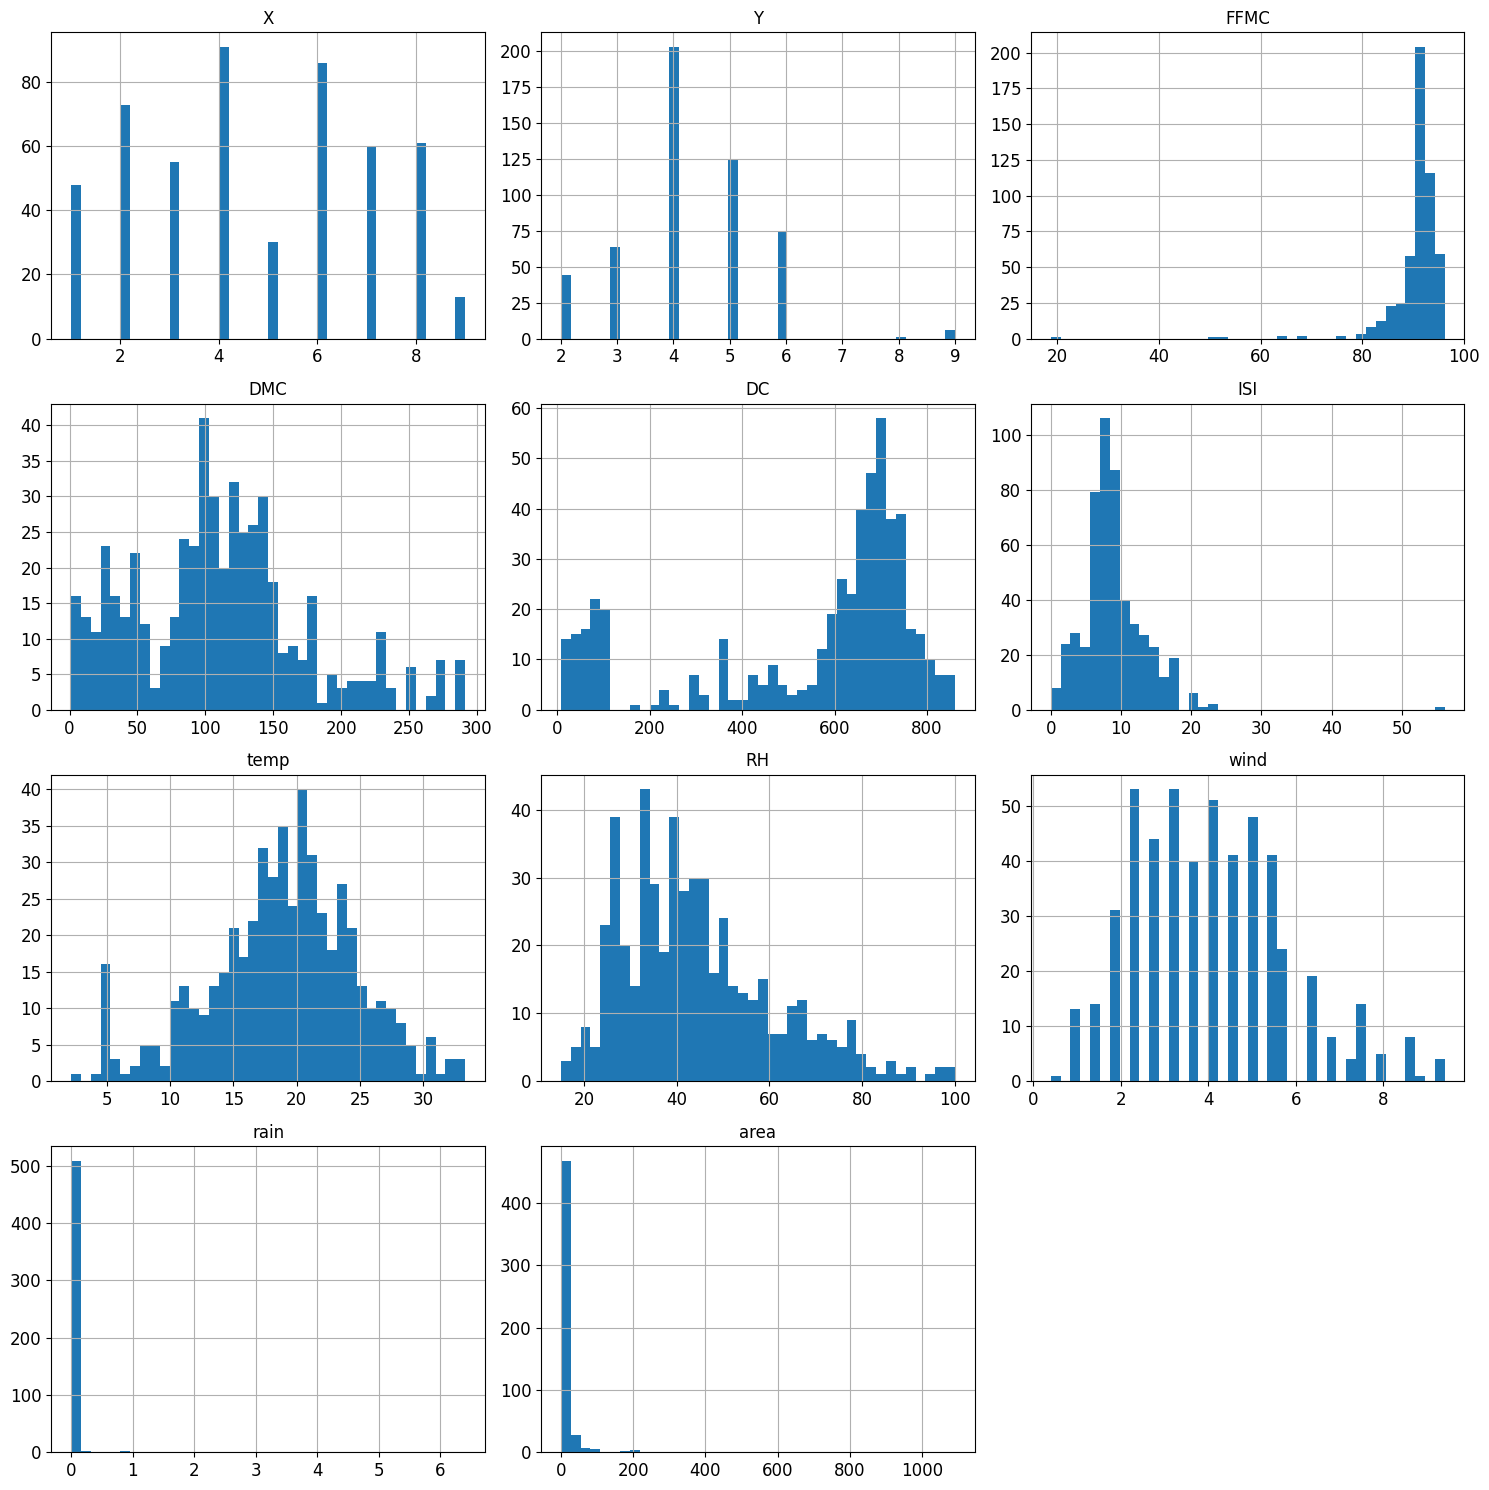

In [10]:
import matplotlib.pyplot as plt
df.hist(bins=40, figsize=(15,15))
save_fig("numeric_attribute_histogram_plots_forestfires")
plt.show()

In [11]:
np.random.seed(42)

In [12]:
import numpy as np
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set,test_set = split_train_test(df, 0.2)
len(train_set)
len(test_set)

103

In [14]:
test_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
304,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
441,8,6,aug,mon,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23
153,5,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95


In [15]:
train_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
320,6,3,sep,thu,92.8,119.0,783.5,7.5,18.9,34,7.2,0.0,34.36
329,4,3,sep,sat,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,sep,mon,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,aug,tue,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68


In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df,test_size=0.2, random_state=42)
test_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
304,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
441,8,6,aug,mon,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23
153,5,4,sep,fri,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95


<Axes: >

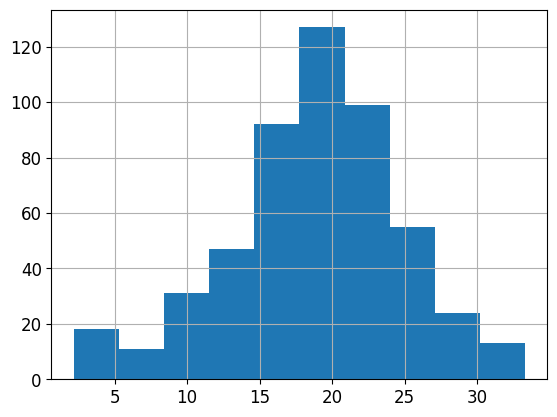

In [17]:
df["temp"].hist()

In [18]:
df["temprange"]=pd.cut( df["temp"],
                  bins=[0,5,10,15,20,25,30,35],
                  labels=[1,2,3,4,5,6,7])
df["temprange"].value_counts()

temprange
4    173
5    166
3     77
6     52
2     27
7     13
1      9
Name: count, dtype: int64

<Axes: >

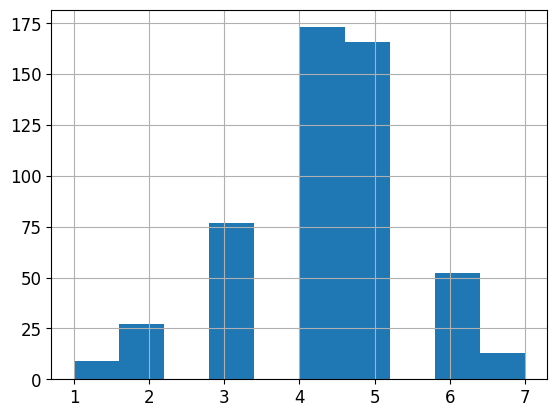

In [19]:
df["temprange"].hist()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['temprange']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [21]:
strat_test_set["temprange"].value_counts() / len(strat_test_set)

temprange
4    0.336538
5    0.317308
3    0.153846
6    0.096154
2    0.048077
7    0.028846
1    0.019231
Name: count, dtype: float64

In [22]:
df["temprange"].value_counts() / len(df)

temprange
4    0.334623
5    0.321083
3    0.148936
6    0.100580
2    0.052224
7    0.025145
1    0.017408
Name: count, dtype: float64

In [23]:
# To calculate proportions for 'Type' column
def type_proportions(data):
    return data["temprange"].value_counts() / len(data)

# Split your dataset 
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

#  a DataFrame to compare proportions
compare_props = pd.DataFrame({
    "Overall": type_proportions(df),              # Proportions in the entire dataset
    "Stratified": type_proportions(strat_test_set),  # Proportions in the stratified test set
    "Random": type_proportions(test_set),         # Proportions in the randomly split test set
}).sort_index()

# Calculate percentage errors for Random and Stratified
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

# Display the result
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
temprange,,,,,
1,0.017408,0.019231,0.019231,10.470085,10.470085
2,0.052224,0.048077,0.067308,28.881766,-7.941595
3,0.148936,0.153846,0.144231,-3.159341,3.296703
4,0.334623,0.336538,0.278846,-16.668519,0.572477
5,0.321083,0.317308,0.326923,1.818814,-1.175857
6,0.100580,0.096154,0.163462,62.518491,-4.400888
7,0.025145,0.028846,0.000000,-100.000000,14.718935


In [29]:
print(strat_train_set.columns)
print(strat_test_set.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


Data Visualization

In [30]:
df = strat_train_set.copy()

Saving figure Bad_Visualization_plot


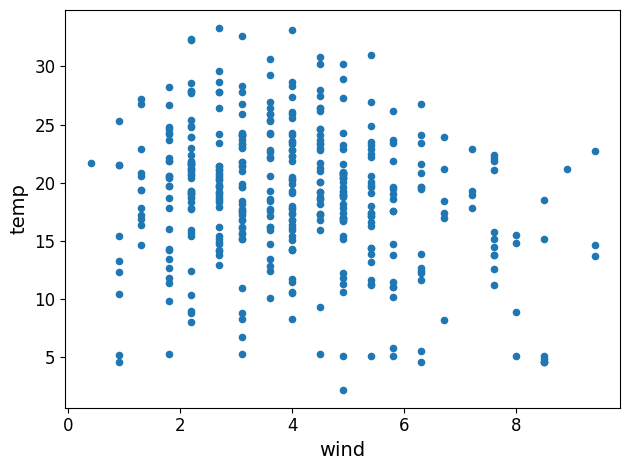

In [31]:
df.plot(kind="scatter", x="wind" , y="temp")
save_fig("Bad_Visualization_plot")

Text(0, 0.5, 'Frequency')

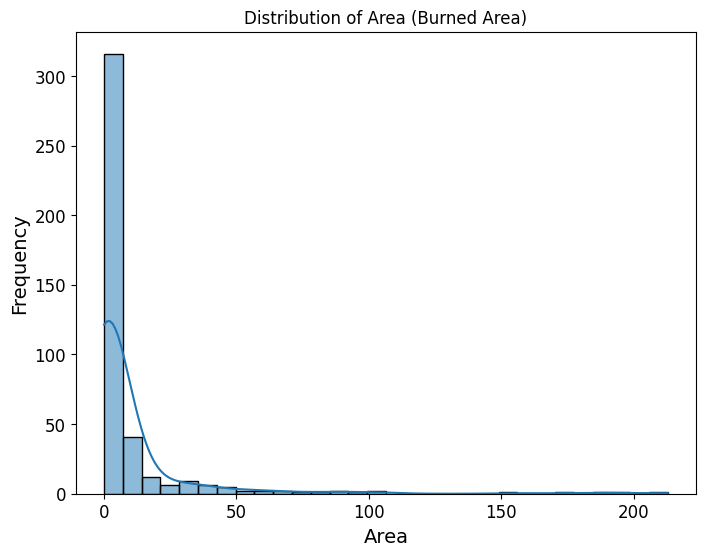

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of 'area' (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Area (Burned Area)')
plt.xlabel('Area')
plt.ylabel('Frequency')

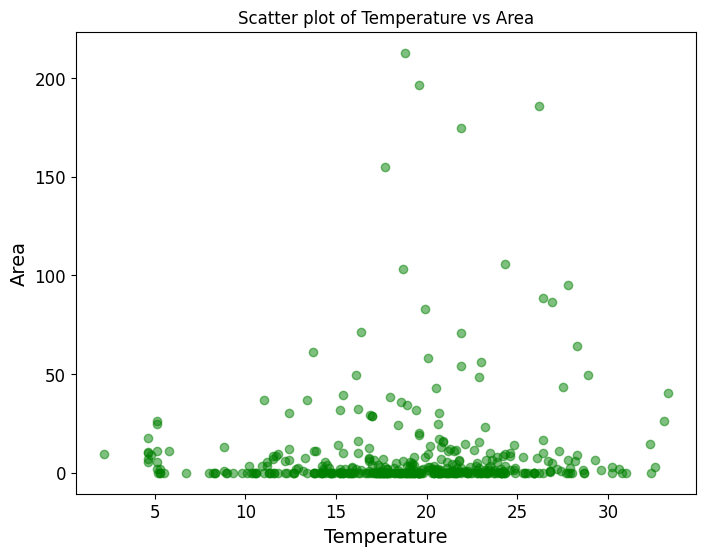

In [33]:
# 5. Scatter plot between 'temp' and 'area'
plt.figure(figsize=(8, 6))
plt.scatter(df['temp'],df['area'],color="green",alpha=0.5)
plt.title('Scatter plot of Temperature vs Area')
plt.xlabel('Temperature')
plt.ylabel('Area')
plt.show()

C:\Users\lahar\AppData\Local\Temp\ipykernel_17644\800339396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='temp', data=avg_temp_by_month, palette="Blues_d")


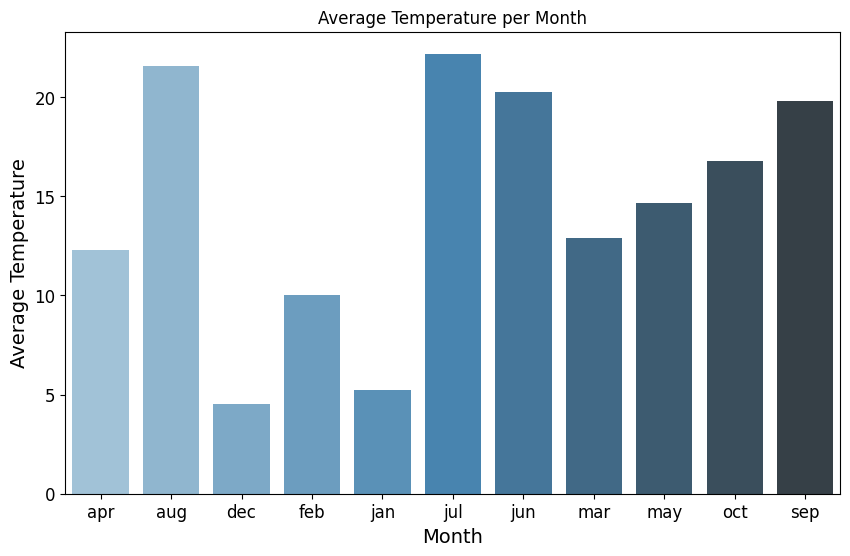

In [34]:
avg_temp_by_month = df.groupby('month')['temp'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='temp', data=avg_temp_by_month, palette="Blues_d")
plt.title('Average Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()


Looking for corelations

In [35]:
num_df=df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
corr_matrix

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.550561,-0.016516,-0.084741,-0.085195,0.019520,-0.067405,0.089678,0.017504,0.067044,0.021852
Y,0.550561,1.000000,-0.069817,-0.041875,-0.125013,-0.053788,-0.064982,0.085312,-0.013271,0.029787,0.032992
FFMC,-0.016516,-0.069817,1.000000,0.370601,0.300055,0.507341,0.408290,-0.300477,-0.025287,0.056424,0.038887
DMC,-0.084741,-0.041875,0.370601,1.000000,0.673851,0.277340,0.450015,0.075330,-0.070796,0.078250,0.101949
DC,-0.085195,-0.125013,0.300055,0.673851,1.000000,0.189196,0.501230,-0.067700,-0.166871,0.037344,0.074865
ISI,0.019520,-0.053788,0.507341,0.277340,0.189196,1.000000,0.368868,-0.136617,0.119661,0.067247,-0.023908
temp,-0.067405,-0.064982,0.408290,0.450015,0.501230,0.368868,1.000000,-0.544656,-0.208357,0.074952,0.085993
RH,0.089678,0.085312,-0.300477,0.075330,-0.067700,-0.136617,-0.544656,1.000000,0.087541,0.102214,-0.089381
wind,0.017504,-0.013271,-0.025287,-0.070796,-0.166871,0.119661,-0.208357,0.087541,1.000000,0.066644,0.009925
rain,0.067044,0.029787,0.056424,0.078250,0.037344,0.067247,0.074952,0.102214,0.066644,1.000000,-0.006656


In [36]:
corr_matrix["area"].sort_values(ascending=False) 

area    1.000000
DMC     0.101949
temp    0.085993
DC      0.074865
FFMC    0.038887
Y       0.032992
X       0.021852
wind    0.009925
rain   -0.006656
ISI    -0.023908
RH     -0.089381
Name: area, dtype: float64

Saving figure scatter_matrix_plot


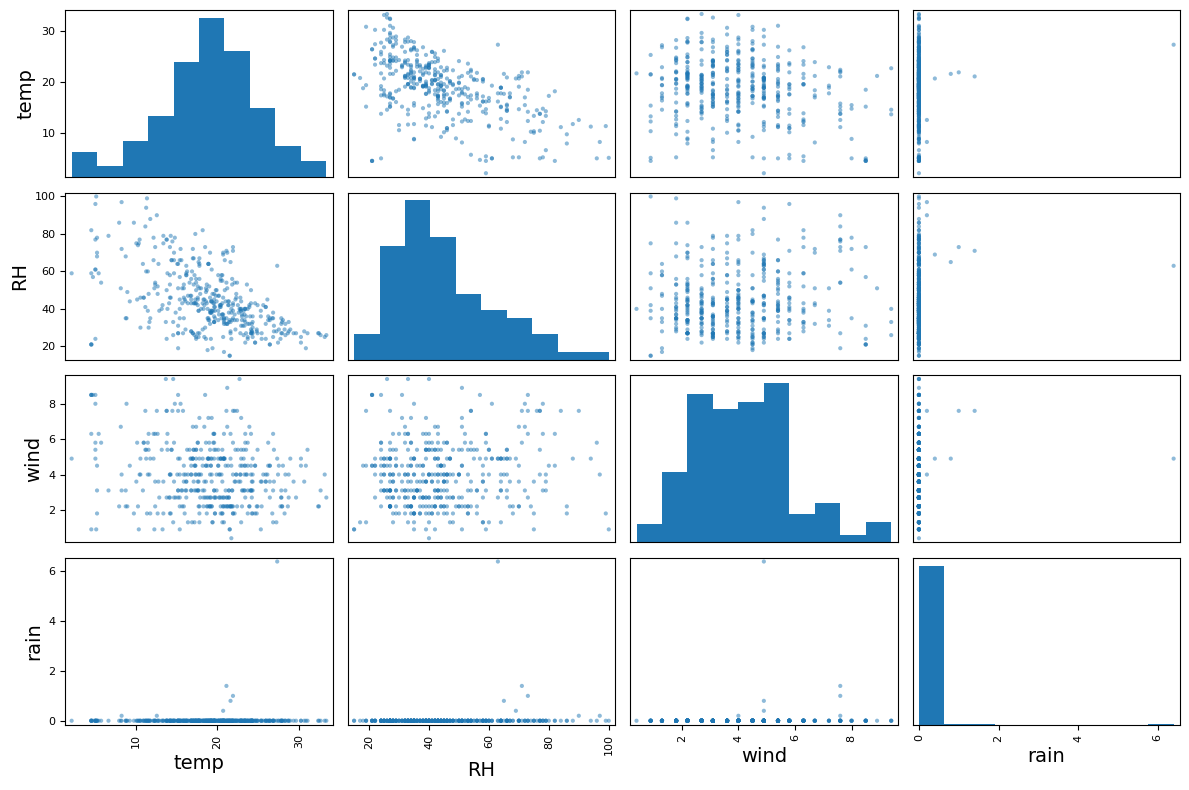

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["temp","RH","wind","rain"]
scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure Perimeter vs Area_Scatterplot


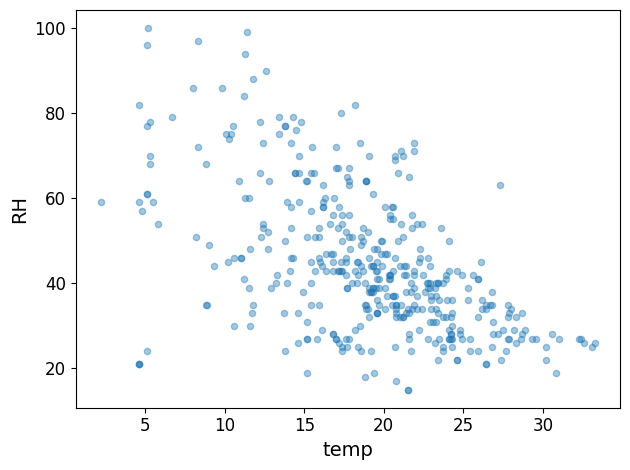

In [38]:
df.plot(kind="scatter", x="temp", y="RH",
             alpha=0.4)
plt.axis()
save_fig("Perimeter vs Area_Scatterplot")

Experimenting wiht attribute combinations

In [39]:
df['temp_wind_interaction'] = df['temp'] * df['wind']
df['temp_RH_ratio'] = df['temp'] / (df['RH'] + 1e-5)  
df['FWI'] = df['FFMC'] * df['DMC'] * df['DC'] * df['ISI']
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,temp_wind_interaction,temp_RH_ratio,FWI
63,2,2,aug,sun,90.2,99.6,631.2,6.3,20.8,33,2.7,0.0,0.00,56.16,0.630303,3.572510e+07
37,7,4,oct,fri,90.0,41.5,682.6,8.7,11.3,60,5.4,0.0,0.00,61.02,0.188333,2.218075e+07
171,8,6,aug,wed,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69,69.60,0.348000,3.113373e+07
483,8,6,aug,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,0.00,167.40,1.148148,1.023627e+08
189,7,4,mar,sun,90.7,44.0,92.4,5.5,11.5,60,4.0,0.0,8.24,46.00,0.191667,2.028125e+06


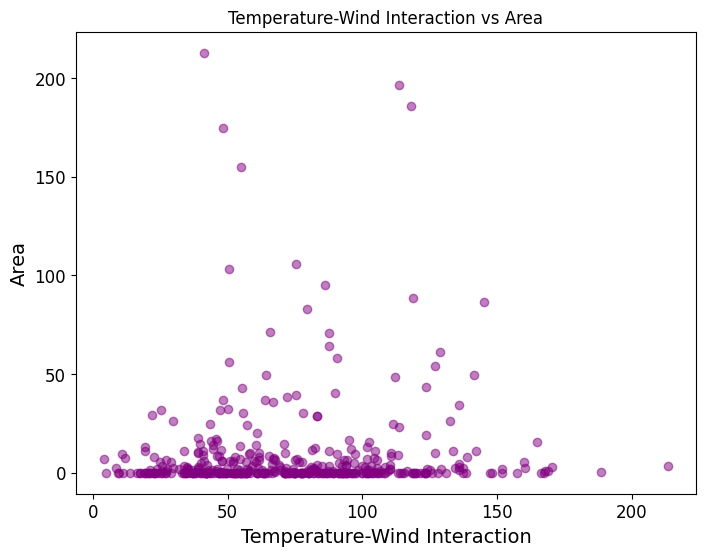

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of temp_wind_interaction vs area
plt.figure(figsize=(8, 6))
plt.scatter(df['temp_wind_interaction'], df['area'], alpha=0.5, color='purple')
plt.title('Temperature-Wind Interaction vs Area')
plt.xlabel('Temperature-Wind Interaction')
plt.ylabel('Area')
plt.show()


Prepare data for Machine Learning 

In [43]:
x=strat_train_set[['temp','RH','rain','wind']]
y=strat_train_set['area']

Data Cleaning

In [44]:
x.isnull().any()

temp    False
RH      False
rain    False
wind    False
dtype: bool

In [45]:
y.isnull().any()

np.False_

Handling text and categorical attributes

In [46]:
catg=df[["month"]]
catg.head()

,month
63,aug
37,oct
171,aug
483,aug
189,mar


Select and Train Model

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,Y_train)
predict_area=lin_reg.predict(X_test_scaled)

Model Evaluation

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
mae=mean_absolute_error(Y_test,predict_area)
mse=mean_squared_error(Y_test,predict_area)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,predict_area)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 12.650593885671503
Mean Squared Error (MSE): 762.4507533112588
Root Mean Squared Error (RMSE): 27.612510811428557
R-squared (R2): 0.0018807543270760174


In [50]:
print("\nCoefficicents:" , lin_reg.coef_)
print("\nIntercept:", lin_reg.intercept_)


Coefficicents: [ 1.4657593  -1.61077586 -0.13547993  1.1868074 ]

Intercept: 9.178878787878789


Better Evaluation Using Cross-Validation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
neg_mae_scorer= make_scorer(mean_absolute_error,greater_is_better=False)
neg_mse_scorer= make_scorer(mean_squared_error, greater_is_better=False)

r2_scores=cross_val_score(lin_reg,X_train,Y_train,scoring='r2',cv=5)
print(f"R-squared(R2) scores:{r2_scores}")
print(f"Mean R2: {r2_scores.mean()}\n")

neg_mae_scores=cross_val_score(lin_reg,X_train,Y_train,scoring=neg_mae_scorer,cv=5)
mae_scores= -neg_mae_scores
print(f"MAE SCORES: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}\n")

neg_mae_scores=cross_val_score(lin_reg,X_train,Y_train,scoring=neg_mae_scorer,cv=5)
mse_scores= -neg_mae_scores
print(f"MSE SCORES: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}\n")

rmse_scores=np.sqrt(mse_scores)
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")

R-squared(R2) scores:[-0.03636406 -0.00297679 -0.06820002  0.00809627 -0.01310875]
Mean R2: -0.022510671562395855

MAE SCORES: [14.76413871 10.27917314 10.40839717 12.62880607 14.07965624]
Mean MAE: 12.432034266136167

MSE SCORES: [14.76413871 10.27917314 10.40839717 12.62880607 14.07965624]
Mean MSE: 12.432034266136167

RMSE scores: [3.84241314 3.20611496 3.22620476 3.55370315 3.7522868 ]
Mean RMSE: 3.5161445619547793


FineTuning using GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'copy_X': [True, False],         # Whether to copy X or overwrite it
    'positive': [True, False]        # Force coefficients to be positive
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters combination found: ", best_params)

Best hyperparameters combination found:  {'copy_X': True, 'fit_intercept': True, 'positive': True}


Evaluating best model

In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = best_model.predict(X_test_scaled)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(f"Test RMSE of the best model:{rmse}")


Test RMSE of the best model:27.620317782837173


Cross-Validation on the Best Model

In [60]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(best_model,X_train_scaled,Y_train,scoring='neg_mean_squared_error',cv=5)
cv_rmse=np.sqrt(-cv_scores)
print("Cross-validated RMSE scores for each fold:",cv_rmse)
print("Average cross-validated RMSE:", cv_rmse.mean())

Cross-validated RMSE scores for each fold: [28.76351    15.53508048 16.32179009 27.37085292 29.9064909 ]
Average cross-validated RMSE: 23.579544876788198


Picking the Best Model

In [61]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
model_filename = 'best_linear_regression_model.pkl'
scaler_filename = 'scaler.pkl'

# Saving model using pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)
print(f"Best model saved as '{model_filename}'")

# Saving scaler using pickle
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print(f"Scaler saved as '{scaler_filename}'")

Best model saved as 'best_linear_regression_model.pkl'
Scaler saved as 'scaler.pkl'
